In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [33]:
data = pd.read_csv("data/diff_preprocessed.csv")
data = data[data["winner"] != 0.5]
m = len(data)


test, cv, train = data.iloc[:round(0.1*m)], data.iloc[round(0.1*m): round(0.2*m)], data.iloc[round(0.2*m):]
x_cols = [col for col in data.columns if col[:4] == "diff"]#data.columns.drop(["winner"])
X_train, y_train = train[x_cols].values, train["winner"].values
X_test, y_test = test[x_cols].values, test["winner"].values
X_cv, y_cv = cv[x_cols].values, cv["winner"].values

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [35]:
model = LogisticRegression(C= 10.0)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
model.score(X_cv_scaled,y_cv)

0.6279926335174953

Max f1 score = 0.6232980332829047
threshold for max f1 score = 0.7197197197197197
Max acc score = 0.6316758747697975
threshold for max acc score = 0.48848848848848847


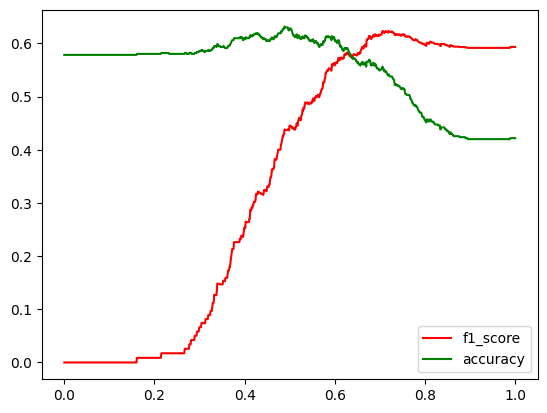

In [37]:
result = model.predict_proba(X_cv_scaled)[:,1]
result=result.flatten()
thresholds = np.linspace(0,1, num=1000)
f1_values = []
acc_values = []
max_f1 = 0
best_thresh_f1 = 0
max_acc = 0
best_thresh_acc = 0

for thresh in thresholds:
    ypred = np.where(result > thresh, 1, 0)
    f1 = f1_score(y_cv, ypred,pos_label= 0)
    acc = accuracy_score(y_cv,ypred)
    if f1 > max_f1:
        max_f1 = f1
        best_thresh_f1 = thresh
    if acc > max_acc:
        max_acc = acc
        best_thresh_acc = thresh
    f1_values.append(f1)
    acc_values.append(acc)

plt.plot(thresholds, np.array(f1_values),color= "r", label= "f1_score")
plt.plot(thresholds, np.array(acc_values),color= "g", label= "accuracy")
plt.legend()

print(f"Max f1 score = {max_f1}")
print(f"threshold for max f1 score = {best_thresh_f1}")
print(f"Max acc score = {max_acc}")
print(f"threshold for max acc score = {best_thresh_acc}")

In [40]:
accuracy_score(y_test, np.where(model.predict_proba(X_test_scaled)[:,1].flatten() > 0.6, 1,0))

0.6623616236162362

In [32]:
model.coef_

array([[-0.35605962, -0.17660709,  0.07832768,  0.17284698, -0.01262099,
        -0.08084981, -0.06829774,  0.00295363, -0.1170645 ,  0.054736  ,
        -0.13151928, -0.01956314, -0.06449546,  0.2044263 ,  0.01377422,
         0.0426228 ,  0.04442645, -0.00936181, -0.0067295 , -0.01277714,
        -0.06424522,  0.01061787, -0.01463982, -0.00458739, -0.01749218,
        -0.00851695, -0.03295385]])

In [43]:
import pickle
threshold = 0.6

with open("models/log_reg_model.pkl", "wb") as f:
    pickle.dump((x_cols, scaler, model, threshold),f)